In [3]:
import keras
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import merge
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


Using TensorFlow backend.


In [0]:
img_size = 250
batch_size = 32
epochs = 200
num_classes = 250
K.set_image_dim_ordering('tf')


In [8]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 3.5MB/s 


In [10]:
#shareable links to get data file IDs
#validation: https://drive.google.com/open?id=1s-fO9x5CpcDqeiaHu39z-SSnLOVWURH7
#training: https://drive.google.com/open?id=1IFjVHO7jrK1NUjfqJkYgQ354bMXQWsRm

fileId = drive.CreateFile({'id': '1IFjVHO7jrK1NUjfqJkYgQ354bMXQWsRm'}) 
#DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('training.zip')  # Save Drive file as a local file

fileId = drive.CreateFile({'id': '1s-fO9x5CpcDqeiaHu39z-SSnLOVWURH7'}) 
#DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('validation.zip')  # Save Drive file as a local file

training.zip
validation.zip


In [11]:
!unzip training.zip -d ./
!unzip validation.zip -d ./

Archive:  training.zip
   creating: ./training/airplane/
  inflating: ./training/airplane/1.png  
  inflating: ./training/airplane/11.png  
  inflating: ./training/airplane/12.png  
  inflating: ./training/airplane/13.png  
  inflating: ./training/airplane/15.png  
  inflating: ./training/airplane/16.png  
  inflating: ./training/airplane/17.png  
  inflating: ./training/airplane/19.png  
  inflating: ./training/airplane/20.png  
  inflating: ./training/airplane/21.png  
  inflating: ./training/airplane/23.png  
  inflating: ./training/airplane/24.png  
  inflating: ./training/airplane/25.png  
  inflating: ./training/airplane/27.png  
  inflating: ./training/airplane/28.png  
  inflating: ./training/airplane/29.png  
  inflating: ./training/airplane/3.png  
  inflating: ./training/airplane/31.png  
  inflating: ./training/airplane/32.png  
  inflating: ./training/airplane/33.png  
  inflating: ./training/airplane/35.png  
  inflating: ./training/airplane/36.png  
  inflating: ./traini

In [0]:
#train_path = 'C:/Users/rantw/Documents/School/CS5590/Project/training/'
train_path = './training'
#val_path = 'C:/Users/rantw/Documents/School/CS5590/Project/validation/'
val_path = './validation'

In [23]:
seed = 731
train_data = ImageDataGenerator(rescale=1./255)
                                #featurewise_center=True,  # set input mean to 0 over the dataset
                                #samplewise_center=True,  # set each sample mean to 0
                                #featurewise_std_normalization=True,  # divide inputs by std of the dataset
                                #rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
                                #width_shift_range=0.4,  # randomly shift images horizontally (fraction of total width)
                                #height_shift_range=0.4,  # randomly shift images vertically (fraction of total height)
                                #zoom_range=0.4, #zooms the image randomly 
                                #horizontal_flip=True,  # randomly flip images
                                #vertical_flip=True)  # randomly flip images)

val_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(train_path,
                                    target_size=(img_size, img_size),
                                    batch_size=batch_size,
                                    seed = seed,
                                    class_mode='categorical')

val_gen = val_data.flow_from_directory(val_path,
                                    target_size=(img_size, img_size),
                                    batch_size=batch_size,
                                    seed = seed,
                                    class_mode='categorical')

Found 15000 images belonging to 250 classes.
Found 5000 images belonging to 250 classes.


(1111, 1111, 3)
Training samples: 15000
Validation samples: 5000
Validation Folder: set()
Training Folder: set()
(array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1

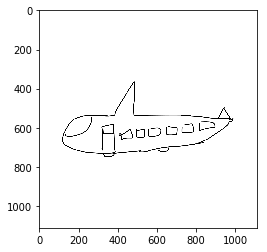

In [30]:

import cv2
import matplotlib.pylab as plt
img = cv2.imread('./training/airplane/71.png')
print(img.shape)
plt.imshow(img);

print('Training samples:', train_gen.samples)
print('Validation samples:',val_gen.samples)
val_ind = val_gen.class_indices
train_ind = train_gen.class_indices
#print('Training Classes:', train_gen.class_indices)
#print('Validation Classes:', val_gen.class_indices)
print('Validation Folder:', set(val_ind) - set(train_ind)) #if set() then no missing or mispelled folders
print('Training Folder:', set(train_ind) - set(val_ind)) #if set() then no missing or mispelled folders
#print(train_gen.shape)
#rint(train_gen[0])
print(train_gen[150])

In [28]:
input_shape = Input(shape=(img_size, img_size, 3))

L1_conv = Conv2D(64, (15, 15), strides=(3, 3),  activation='relu')(input_shape)
L1_pool = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(L1_conv)

L2_conv = Conv2D(128, (5, 5), strides=(1, 1), activation='relu')(L1_pool)
L2_pool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(L2_conv)

L3_conv = Conv2D(256, (5, 5), strides=(1, 1), activation='relu')(L2_pool)
L3_pool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(L3_conv)

# Tower A
TowerA_conv1 = Conv2D(48, (1, 1))(L3_pool)
TowerA_conv2 = Conv2D(64, (3, 3))(TowerA_conv1)
#TowerA_conv3 = Conv2D(128, (1, 1))(TowerA_conv2)

# Tower B
TowerB_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(L3_pool)
TowerB_conv1 = Conv2D(64, (1, 1))(TowerB_pool)
#TowerB_conv2 = Conv2D(128, (1, 1))(TowerB_conv1)

# Tower C
TowerC_conv1 = Conv2D(64, (3, 3))(L3_pool)
#TowerC_conv2 = Conv2D(128, (1, 1))(TowerC_conv1)

# Merge Towers
L_merged = keras.layers.concatenate([TowerA_conv2, TowerB_conv1, TowerC_conv1], axis=-1)

L5_pool = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(L_merged)

#L6_conv = Conv2D(256, (1, 1), strides=(1, 1), activation='relu')(L5_pool)

L_flat = Flatten()(L5_pool)
#L_flat = Flatten()(L6_conv)
L6_fullC1 = Dense(256, activation='relu')(L_flat)
L_dr = Dropout(0.5)(L6_fullC1)
L7_fullC2 = Dense(num_classes, activation='softmax')(L_dr)
model = Model(input_shape, L7_fullC2)


lrate = 0.00001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 250, 250, 3)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 79, 79, 64)   43264       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 39, 39, 64)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 35, 35, 128)  204928      max_pooling2d_5[0][0]            
__________________________________________________________________________________________________
max_poolin

In [29]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor = 'val_acc', patience=10),
            ModelCheckpoint(filepath = 'bestModel.h5', monitor ='val_acc', save_best_only=True)]

history = model.fit_generator(train_gen,
                              steps_per_epoch=train_gen.samples // batch_size,
                              validation_data=val_gen,
                              validation_steps=val_gen.samples // batch_size,
                              epochs=epochs,
                              verbose=1,
                              callbacks = callbacks)

Epoch 1/200
468/468 [==============================] - 104s 221ms/step - loss: 5.5251 - acc: 0.0044 - val_loss: 5.5227 - val_acc: 0.0042
Epoch 2/200
468/468 [==============================] - 95s 204ms/step - loss: 5.5237 - acc: 0.0058 - val_loss: 5.5221 - val_acc: 0.0038
Epoch 3/200
468/468 [==============================] - 95s 204ms/step - loss: 5.5238 - acc: 0.0045 - val_loss: 5.5219 - val_acc: 0.0036
Epoch 4/200
 25/468 [>.............................] - ETA: 52s - loss: 5.5246 - acc: 0.0000e+00

KeyboardInterrupt: ignored